In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_excel("credit_card_clients.xls", header=1, index_col="ID")

In [41]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
def evaluete_cred(e):
    if e < 0:
        return "positive"
    elif e > 0:
        return "negative"
    else:
        return "neutral"

def get_credit_hist(df, col):
    return df[col].apply(evaluete_cred)

In [43]:
pay_cols = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
for c in pay_cols:
    df[c] = get_credit_hist(df, c)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,negative,negative,positive,positive,positive,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,positive,negative,neutral,neutral,neutral,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,neutral,neutral,neutral,neutral,neutral,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,neutral,neutral,neutral,neutral,neutral,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,positive,neutral,positive,neutral,neutral,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,neutral,neutral,neutral,neutral,neutral,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,positive,positive,positive,positive,neutral,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,negative,negative,negative,positive,neutral,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [44]:
df.PAY_0.value_counts()

PAY_0
neutral     14737
positive     8445
negative     6818
Name: count, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  int64 
 1   SEX                         30000 non-null  int64 
 2   EDUCATION                   30000 non-null  int64 
 3   MARRIAGE                    30000 non-null  int64 
 4   AGE                         30000 non-null  int64 
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  int64 
 12  BILL_AMT2                   30000 non-null  int64 
 13  BILL_AMT3                   30000 non-null  int64 


In [46]:
num_cols = [
    "LIMIT_BAL", 
    "AGE", 
    "BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6",
    "PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6",
]

In [47]:
cat_cols = [
    "SEX",
    "EDUCATION",
    "MARRIAGE",
    "PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6",
]

In [48]:
def treat_categorical(cat_cols, df):
    for c in cat_cols:
        df = df.join(pd.get_dummies(df[c], prefix=c, dtype=int, drop_first=True))
    df.drop(cat_cols, axis=1, inplace=True)
    return df

In [49]:
df = treat_categorical(cat_cols, df)

In [50]:
df

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_2_neutral,PAY_2_positive,PAY_3_neutral,PAY_3_positive,PAY_4_neutral,PAY_4_positive,PAY_5_neutral,PAY_5_positive,PAY_6_neutral,PAY_6_positive
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,1,0,1,0,1,0,1
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,1,0,1,0,1,0,0,0
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,1,0,1,0,1,0,1,0,1,0
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,1,0,1,0,1,0,1,0,1,0
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,...,1,0,1,0,1,0,1,0,1,0
29997,150000,43,1683,1828,3502,8979,5190,0,1837,3526,...,0,1,0,1,0,1,1,0,1,0
29998,30000,37,3565,3356,2758,20878,20582,19357,0,0,...,0,0,0,0,0,1,1,0,1,0


separação para treino

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
y = df["default payment next month"]
X = df.drop(["default payment next month"], axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

normalização

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

PCA

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca=PCA(n_components=int(len(X_train[num_cols].columns)))

In [58]:
pca.fit(X_train)

PCA(n_components=14)

In [59]:
pca_soma = sum(pca.explained_variance_ratio_)
pca_soma

0.9730365169073438

In [60]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ["PC_"+str(n) for n in range(1, len(per_var)+1)]
print(labels)

['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14']


In [61]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

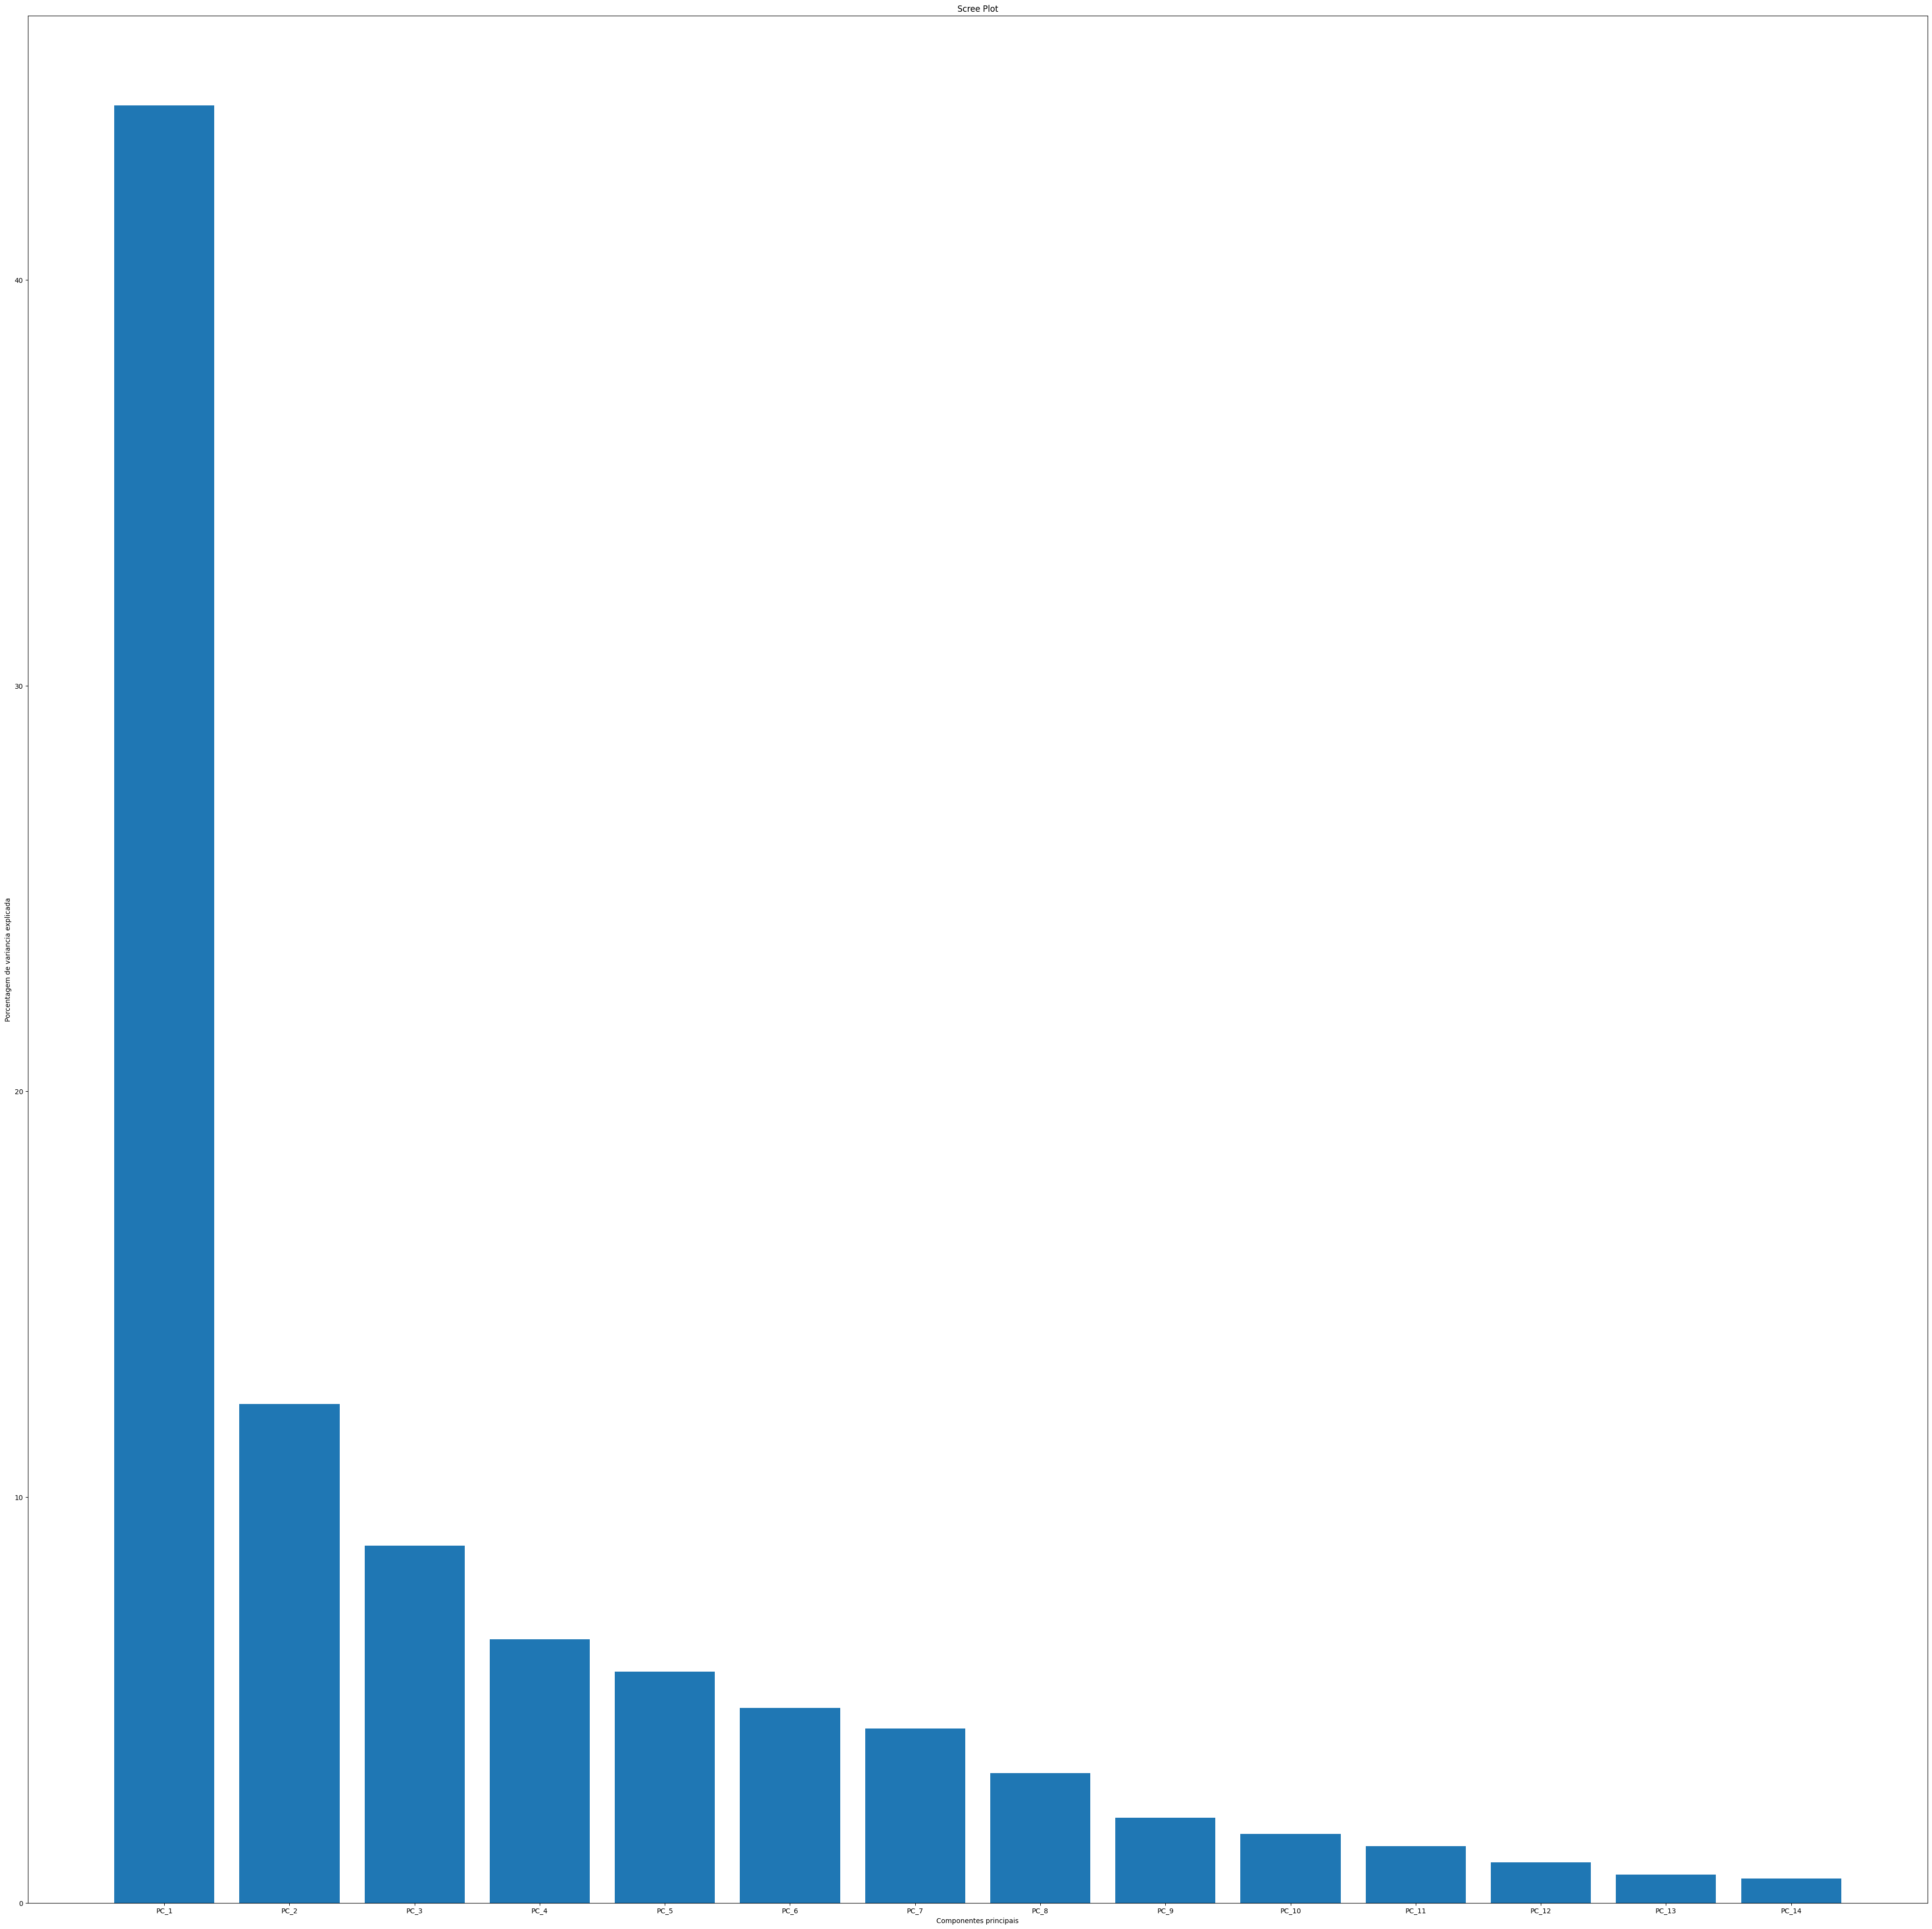

In [62]:
plt.figure(figsize=(50,50))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Porcentagem de variancia explicada')
plt.xlabel('Componentes principais')
plt.title('Scree Plot')

plt.show()

In [63]:
count = 0
for i in pca.explained_variance_ratio_:
    if i > 0.01:
        count += 1
    print("{:.15f}".format(i))
print(count) 

0.443181876334551
0.123165361914570
0.087789934532169
0.064607273854140
0.056668576107994
0.048227542856767
0.042653682513173
0.031997521429180
0.021196589324929
0.016702957397109
0.014007659334071
0.010306919261862
0.006933358429856
0.005597263616974
12


In [64]:
pca=PCA(n_components=count)
pca.fit(X_train[num_cols])
pca_soma = sum(pca.explained_variance_ratio_)
pca_soma

0.9983045058711957

In [65]:
from copy import deepcopy

In [66]:
def apply_PCA(X_in, num_cols, pca):
    pc_labels = ["PC_"+str(n) for n in range(1, pca.n_components_+1)]
    X_out = deepcopy(X_in)
    X_out[pc_labels] = pca.transform(X_out[num_cols])
    X_out.drop(num_cols, axis=1, inplace=True)
    return X_out

In [67]:
X_train = apply_PCA(X_train, num_cols, pca)
X_test = apply_PCA(X_test, num_cols, pca)

treino

In [68]:
import tensorflow as tf

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(len(X_train.columns), 1)),
    tf.keras.layers.Dense(4*len(X_train.columns), activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(int(len(X_train.columns)/10))
])

/Users/bernardorusso/Documents/GitHub/pos-grad-tcc-study/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
predictions = model(X_train[:1]).numpy()
predictions

array([[-0.23308973, -0.1287576 , -0.47953308]], dtype=float32)

In [71]:
tf.nn.softmax(predictions).numpy()

array([[0.34583592, 0.38386717, 0.27029693]], dtype=float32)

In [72]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [73]:
loss_fn(y_train[:1], predictions).numpy()

0.9574587

In [74]:
model.compile(
    optimizer="adam",
    loss=loss_fn,
    metrics=["accuracy"]
)

In [75]:
model.fit(X_train, y_train, epochs=6)

Epoch 1/6


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.7842 - loss: 0.5230
Epoch 2/6
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.8104 - loss: 0.4528
Epoch 3/6
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.8105 - loss: 0.4467
Epoch 4/6
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.8176 - loss: 0.4395
Epoch 5/6
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.8157 - loss: 0.4382
Epoch 6/6
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.8206 - loss: 0.4327


In [76]:
model.evaluate(X_test,  y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.8066 - loss: 0.4443


[0.4408133327960968, 0.8109999895095825]

SHAP

ICE Plot

PDP